<a href="https://colab.research.google.com/github/YuchenLi27/5500-final-frontend/blob/master/Copy_of_Mechine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape after cleaning: (10000, 6)

Missing values check:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


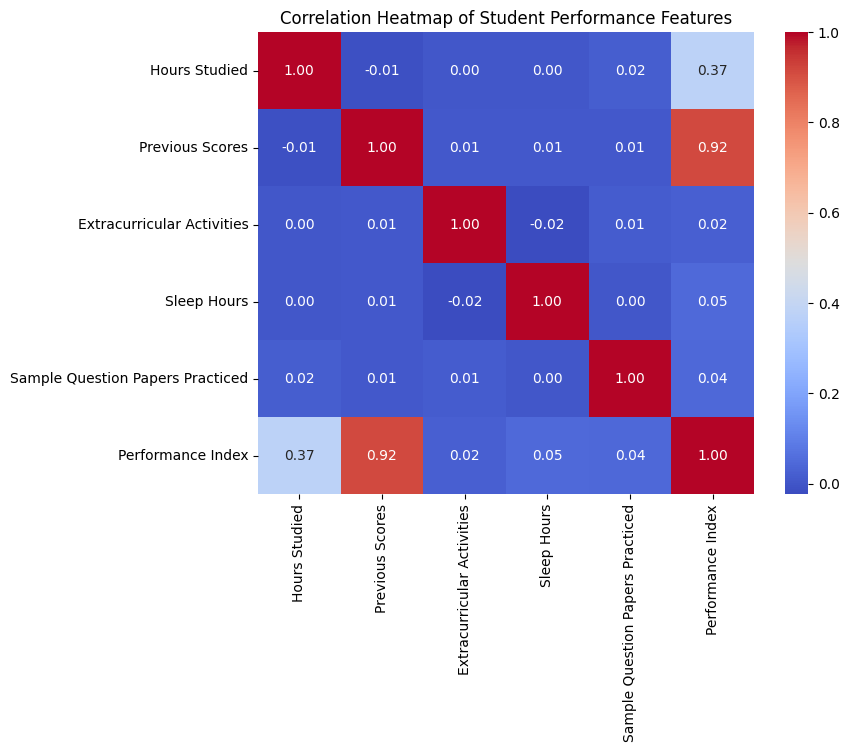

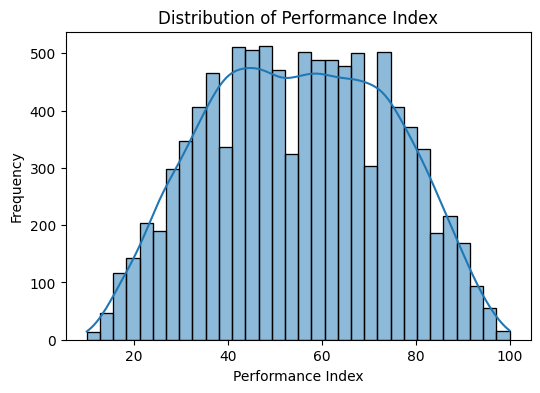

EDA Insight: The heatmap shows linear relationships between predictors and the target variable. The histogram indicates that the Performance Index is approximately normally distributed, supporting the use of linear regression.
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Sun, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:57:07   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                         

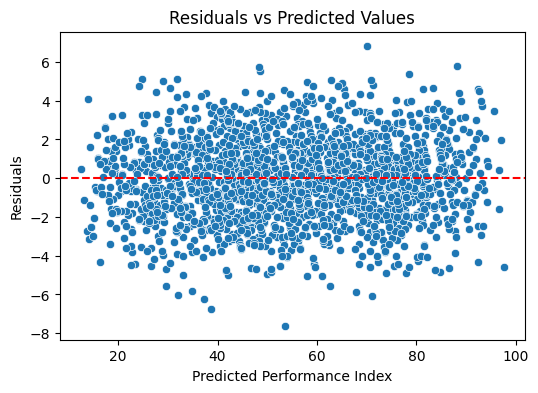

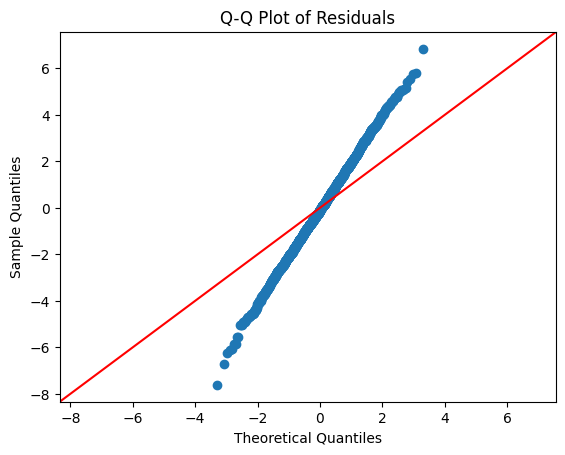

Residual diagnostics: The residuals are randomly scattered around zero with no visible pattern, indicating homoscedasticity. The Q-Q plot shows residuals closely following the 45-degree line, suggesting that the errors are approximately normally distributed.
Holding all other variables constant, a one-hour increase in sleep is associated with an average increase of 0.48 points in the Performance Index.
Variable with the highest p-value: Extracurricular Activities
Predicted Performance Index for a student who studies 10 hours and sleeps 8 hours: 70.53


In [2]:
# ===========================
# Task 0: Import Libraries
# ===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===========================
# Step 1: Load and Clean Data
# ===========================
df = pd.read_csv("/content/Student_Performance.csv")

# Encode categorical variable
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Handle missing / infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Data shape after cleaning:", df.shape)
print("\nMissing values check:\n", df.isnull().sum())

# ===========================
# Task 1: Exploratory Data Analysis (EDA)
# ===========================

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Features")
plt.show()

# Histogram of target variable
plt.figure(figsize=(6,4))
sns.histplot(df['Performance Index'], kde=True)
plt.title("Distribution of Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Frequency")
plt.show()

print(
    "EDA Insight: The heatmap shows linear relationships between predictors "
    "and the target variable. The histogram indicates that the Performance Index "
    "is approximately normally distributed, supporting the use of linear regression."
)

# ===========================
# Task 2: Preprocessing
# ===========================

X = df[['Hours Studied',
        'Previous Scores',
        'Sleep Hours',
        'Sample Question Papers Practiced',
        'Extracurricular Activities']]

y = df['Performance Index']

# 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add constant term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# ===========================
# Task 3: Model Execution
# ===========================

model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

# ===========================
# Task 4: Evaluation & Visual Diagnostics
# ===========================

# Predictions on test set
y_pred = model.predict(X_test_sm)

# Metrics (reported on test set)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nTest R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

print(
    "Residual diagnostics: The residuals are randomly scattered around zero "
    "with no visible pattern, indicating homoscedasticity. "
    "The Q-Q plot shows residuals closely following the 45-degree line, "
    "suggesting that the errors are approximately normally distributed."
)

# ===========================
# Task 5: Analysis & Prediction
# ===========================

# 1. Interpret Sleep coefficient
sleep_coef = model.params['Sleep Hours']
print(
    f"Holding all other variables constant, a one-hour increase in sleep "
    f"is associated with an average increase of {sleep_coef:.2f} points "
    f"in the Performance Index."
)

# 2. Identify variable with highest p-value (excluding intercept)
max_pval_var = model.pvalues.drop('const').idxmax()
print(f"Variable with the highest p-value: {max_pval_var}")

# 3. Predict score for a new student (10h study, 8h sleep)
# Other variables are set to sample means for fair prediction
new_student = pd.DataFrame({
    'Hours Studied': [10],
    'Previous Scores': [df['Previous Scores'].mean()],
    'Sleep Hours': [8],
    'Sample Question Papers Practiced': [df['Sample Question Papers Practiced'].mean()],
    'Extracurricular Activities': [1]
})

new_student_sm = sm.add_constant(new_student, has_constant='add')
new_student_sm = new_student_sm[X_train_sm.columns]

predicted_score = model.predict(new_student_sm)

print(
    f"Predicted Performance Index for a student who studies 10 hours "
    f"and sleeps 8 hours: {predicted_score.iloc[0]:.2f}"
)


Model Diagnostics: Error Distribution Analysis

The residual plot shows a random scatter of residuals around zero with no visible pattern, indicating that the model errors are random and exhibit homoscedasticity (constant variance).

The Q-Q plot demonstrates that the residuals closely follow the 45-degree reference line, particularly in the central region, suggesting that the residuals are approximately normally distributed. Minor deviations at the tails are observed but are not substantial enough to indicate serious violations of normality.

This visual assessment is supported by statistical tests from the OLS regression summary. The Omnibus test yields a p-value of 0.096, and the Jarque-Bera test yields a p-value of 0.0825. Since both p-values are greater than the 0.05 significance level, we fail to reject the null hypothesis that the residuals are normally distributed.

Overall, both visual and statistical evidence indicate that the OLS assumptions regarding error randomness and normality are reasonably satisfied. Therefore, the model’s coefficient estimates, hypothesis tests, and predictions can be considered reliable.